# Split dataset tests

In [1]:
# Allow reloading of libraries without restarting the kernel
%load_ext autoreload
%autoreload 2

## Raw dataset

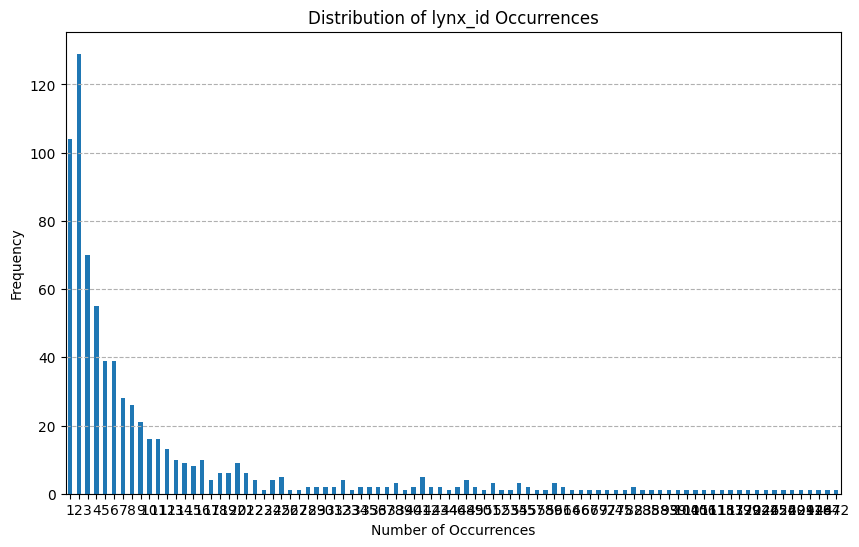

In [12]:
from pathlib import Path
import pandas as pd
from lynx_id.utils.split_dataset import plot_occurrence_distribution

# Define the path
dataset_csv = Path('/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset_full.csv')

# Check if the file exists before attempting to load it
if dataset_csv.is_file():
    # Load the CSV file into a DataFrame
    df = pd.read_csv(dataset_csv)
    # Display the first few rows to understand its features
    display = df.head()
    # Also list all column names to see the features explicitly
    features = df.columns.tolist()
else:
    display = "File does not exist at the specified path."
    features = []

#display, features

plot_occurrence_distribution(df, 'lynx_id')


## Splitting the csv

### Naive split

Number of samples in the training set: 8281
Number of samples in the validation set: 1774
Number of samples in the test set: 1775


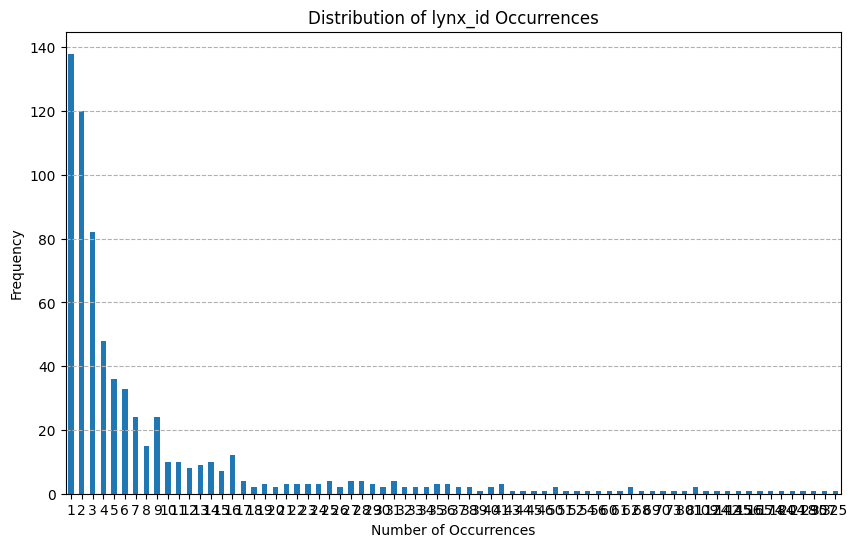

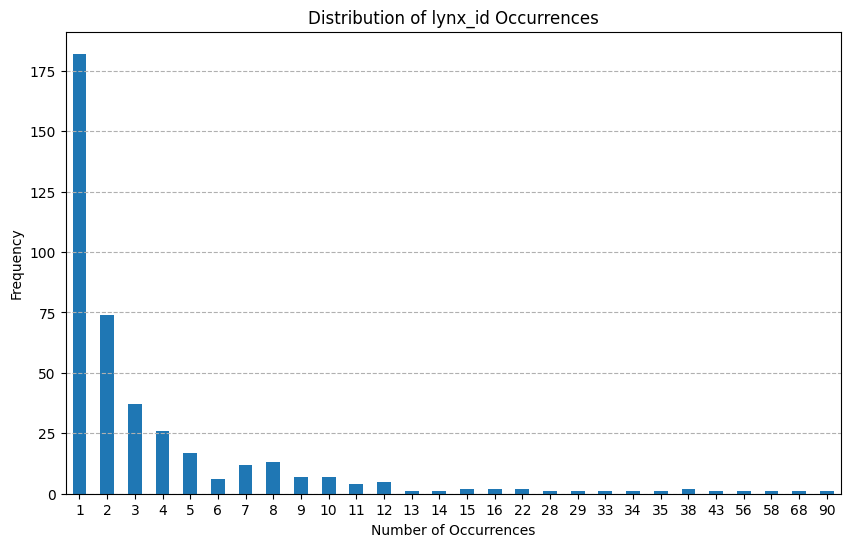

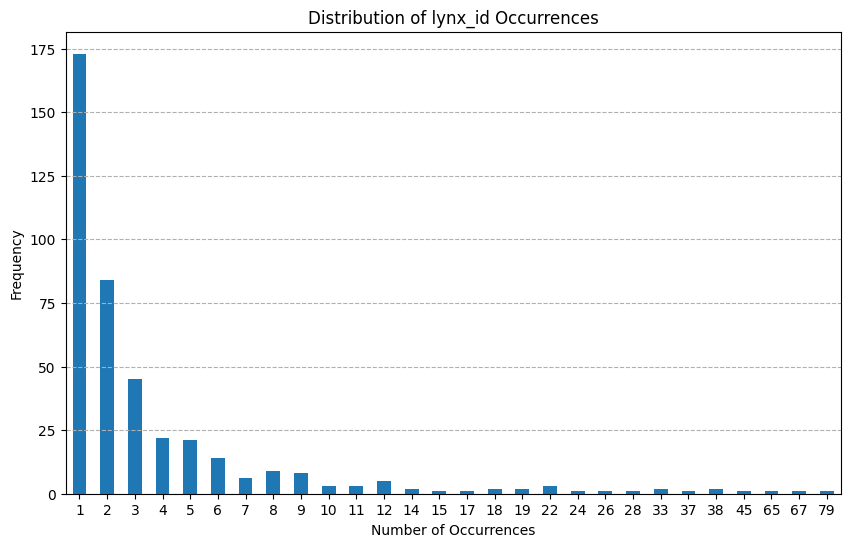

In [13]:
from lynx_id.utils.split_dataset import naive_split_dataset

# Assuming dataset_csv is defined and points to the path of your dataset
train_df, val_df, test_df = naive_split_dataset(dataset_csv, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_seed=42)

# Instead of just printing the length, add a description to make it clear what's being printed
print(f"Number of samples in the training set: {len(train_df)}")
print(f"Number of samples in the validation set: {len(val_df)}")
print(f"Number of samples in the test set: {len(test_df)}")

plot_occurrence_distribution(train_df, 'lynx_id')
plot_occurrence_distribution(val_df, 'lynx_id')
plot_occurrence_distribution(test_df, 'lynx_id')

### Advanced split

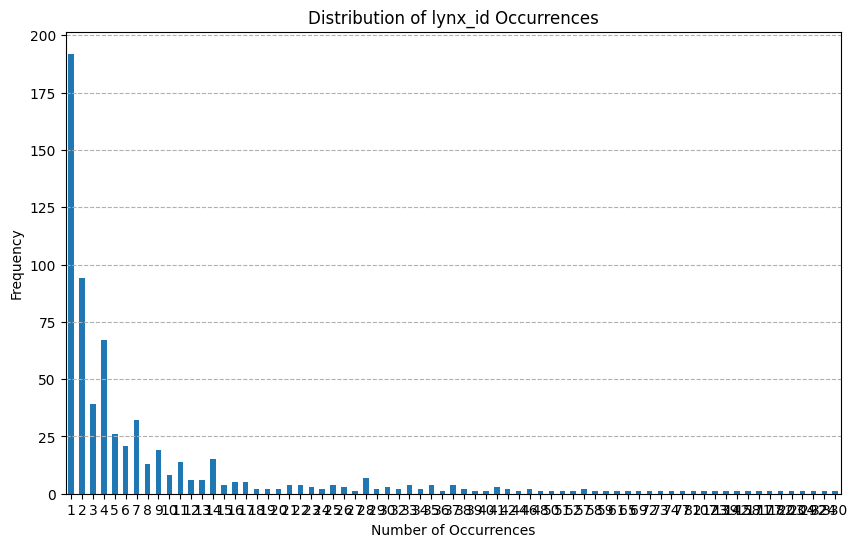

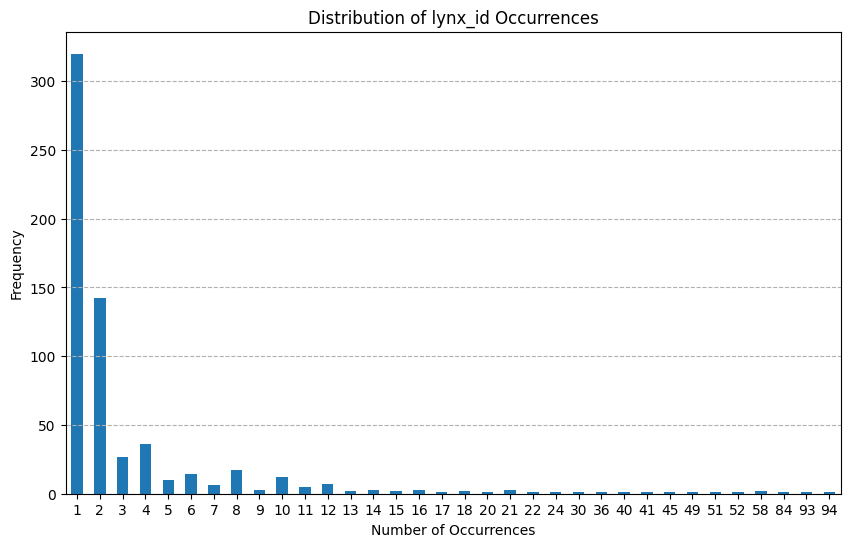

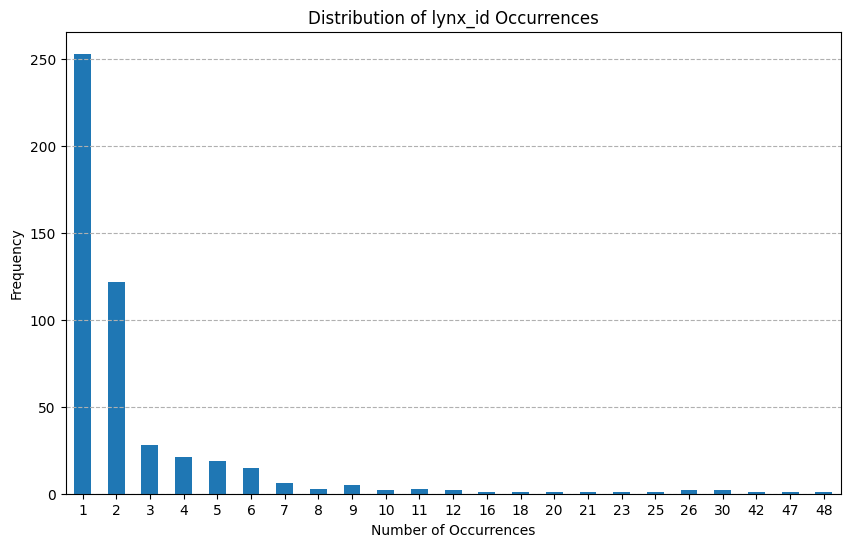

In [17]:
from lynx_id.utils.split_dataset import complex_split_dataset
train_df, val_df, test_df, complete_df = complex_split_dataset(df, threshold=5, high_occurrence_ratios=(0.7, 0.2, 0.1), unseen_ratio=0.2, random_seed=42)
plot_occurrence_distribution(train_df, 'lynx_id')
plot_occurrence_distribution(val_df, 'lynx_id')
plot_occurrence_distribution(test_df, 'lynx_id')

In [18]:
complete_df[complete_df["set"]=="val"].head()
complete_df[complete_df["lynx_id_visibility"]=="seen"].head()


,filepath,lynx_id,source,pattern,date,location,image_number,conf,x,y,...,number_animals,number_children,sex,side,latitude,longitude,country,filepath_no_bg,set,lynx_id_visibility
0,/gpfsscratch/rech/ads/commun/datasets/extracte...,B38_Stefan,NaN,NaN,NaN,NaN,298.0,0.949,768.0000,607.9488,...,NaN,NaN,NaN,NaN,NaN,NaN,Germany,/gpfsscratch/rech/ads/commun/datasets/extracte...,train,seen
1,/gpfsscratch/rech/ads/commun/datasets/extracte...,B38_Stefan,NaN,NaN,NaN,NaN,155.0,0.962,1240.7904,879.8544,...,NaN,NaN,NaN,NaN,NaN,NaN,Germany,/gpfsscratch/rech/ads/commun/datasets/extracte...,train,seen
2,/gpfsscratch/rech/ads/commun/datasets/extracte...,B38_Stefan,NaN,NaN,NaN,NaN,27.0,0.903,362.9584,756.8960,...,NaN,NaN,NaN,NaN,NaN,NaN,Germany,/gpfsscratch/rech/ads/commun/datasets/extracte...,train,seen
3,/gpfsscratch/rech/ads/commun/datasets/extracte...,B38_Stefan,NaN,NaN,NaN,NaN,8.0,0.969,801.9968,637.9008,...,NaN,NaN,NaN,NaN,NaN,NaN,Germany,/gpfsscratch/rech/ads/commun/datasets/extracte...,train,seen
4,/gpfsscratch/rech/ads/commun/datasets/extracte...,B38_Stefan,NaN,NaN,NaN,NaN,430.0,0.969,608.8704,567.8592,...,NaN,NaN,NaN,NaN,NaN,NaN,Germany,/gpfsscratch/rech/ads/commun/datasets/extracte...,train,seen


## Splitting using the dataset class

### Using the `split` method

In [28]:
from lynx_id.data.dataset import LynxDataset
dataset = LynxDataset(dataset_csv=train_df, loader="pil", mode="single")

input, output = dataset[0]  # Example for getting the first item

# Accessing data
image = input['image']
lynx_id = output['lynx_id']

In [30]:
train_set, val_set, test_set= dataset.split()
print(len(train_set))
print(len(val_set))
print(len(test_set))

6130
732
1072


### Using the `set` parameter

In [7]:
from pathlib import Path
from lynx_id.data.dataset import LynxDataset
dataset_csv = Path('/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset_full.csv')

dataset = LynxDataset(dataset_csv=dataset_csv, set="test", loader="pil", mode="single")

input, output = dataset[0]  # Example for getting the first item

# Accessing data
image = input['image']
lynx_id = output['lynx_id']
print(len(dataset))

/gpfsdswork/projects/rech/ads/ssos023/DP-SCR_Identify-and-estimate-density-lynx-population/lynx_id/data/dataset.py:45: UserWarning: The 'set' column was not found in the dataset. Proceeding to split the dataset based on provided parameters.
  warnings.warn("The 'set' column was not found in the dataset. Proceeding to split the dataset based on provided parameters.")


1366
